# Predicting time_to_sell for cars

## Loading in Data

In [130]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Read ds into dataframe

data_path = f"../data/rate_of_sale_may_2023.snappy.parquet"

data_dict_path = f"../data/rate_of_sale_data_dict.csv"

data = pd.read_parquet(data_path)

data_dict_df = pd.read_csv(data_dict_path)

data.head(3)


,stock_item_id,last_date_seen,first_date_seen,days_to_sell,first_retailer_asking_price,last_retailer_asking_price,can_home_deliver,reviews_per_100_advertised_stock_last_12_months,segment,seats,doors,co2_emission_gpkm,top_speed_mph,zero_to_sixty_mph_seconds,engine_power_bhp,fuel_economy_wltp_combined_mpg,battery_range_miles,battery_usable_capacity_kwh,length_mm,boot_space_seats_up_litres,insurance_group,plate,make,model,generation,derivative,derivative_id,body_type,fuel_type,transmission_type,drivetrain,colour,odometer_reading_miles,first_registration_date,attention_grabber,manufacturer_approved,price_indicator_rating,adjusted_retail_amount_gbp,predicted_mileage,number_of_images,advert_quality,postcode_area
0,52ae009b671ab58b3d4ff109a9fbdcf8d847de0fa190e1...,2023-05-05,2021-03-25,771,6995,6495.0,False,3.9,Independent,5.0,3.0,194.0,137.0,7.2,172.0,22.1,NaN,None,3803.0,NaN,31,04,Renault,Clio,Hatchback (2001 - 2005),2.0 16v Renaultsport 3dr,f910dd7ace96336e8f0d18a2d52b3a60,Hatchback,Petrol,Manual,Front Wheel Drive,None,65000,2004-05-07,*IMMACULATE**FULL HISTORY*,False,NOANALYSIS,NaN,NaN,50,NaN,AL
1,32b1bac6934b1f64ff43cffa9df5aa296ead8143c36f9f...,2023-05-09,2021-05-25,714,13725,14995.0,False,NaN,Franchise,5.0,5.0,108.0,113.0,None,99.0,50.4,NaN,None,4065.0,311.0,10,69,Ford,Fiesta,Hatchback (2017 - 2021),1.0T EcoBoost ST-Line Euro 6 (s/s) 5dr,4b854496509949d288c1bf6c9694e3f6,Hatchback,Petrol,Manual,Front Wheel Drive,Silver,16018,2019-11-30,Sports Styling | Great Economy,True,GOOD,14848.0,26078.0,15,57.0,HP
2,21703d22d87eaa95c4dc81a60ba2c8cbe3b90ab659292c...,2023-05-12,2021-11-26,532,15499,13999.0,False,0.2,Independent,5.0,5.0,144.0,112.0,12.4,110.0,44.8,NaN,None,4314.0,448.0,10,18,MG,MG ZS,SUV (2017 - 2021),1.0 T-GDI Exclusive Auto Euro 6 5dr,dc4723bdcb6d4b74b7bd4a522b854882,SUV,Petrol,Automatic,Front Wheel Drive,Blue,31093,2018-03-08,"Sat Nav,Leather,Auto,Euro 6",False,GREAT,14571.0,34732.0,22,61.0,SR


## Features

In [131]:
features = [
            'first_retailer_asking_price',
            'can_home_deliver',
            'reviews_per_100_advertised_stock_last_12_months',
            'segment',
            'seats',
            'doors',
            'co2_emission_gpkm',
            'top_speed_mph',
            'zero_to_sixty_mph_seconds',
            'engine_power_bhp',
            'fuel_economy_wltp_combined_mpg',
            'battery_range_miles',
            'battery_usable_capacity_kwh',
            'length_mm',
            'boot_space_seats_up_litres',
            'insurance_group',
            'plate',
            'make',
            'model',
            'body_type',
            'fuel_type',
            'transmission_type',
            'drivetrain',
            'colour',
            'odometer_reading_miles',
            'first_registration_date',
            'manufacturer_approved',
            'price_indicator_rating',
            'adjusted_retail_amount_gbp',
            'predicted_mileage',
            'number_of_images',
            'advert_quality',
            'postcode_area'
            ]

## Data Cleaning

Remove all rows missing target value

In [132]:
target = 'days_to_sell'

# Dropping rows with missing target values
data_target_cleaned = data.dropna(subset=[target])

wanted = features + [target]
data_features_cleaned = data_target_cleaned[wanted]

print(f"Num Features: {len(features)}")
print(f"Cleaned Shape: {data_features_cleaned.shape}")

Num Features: 33
Cleaned Shape: (224555, 34)


Explore distributions of nan's in all features.

In [133]:
def check_nans(df):
    nan_counts = {}

    # Iterate through each column
    for column in df.columns:
        # Count NaN values for the column
        nan_count = df[column].isna().sum()
        # Store column name and NaN count in the dictionary
        nan_counts[column] = nan_count

    # Convert the dictionary to a DataFrame
    nan_counts_df = pd.DataFrame.from_dict(nan_counts, orient='index', columns=['NaN Count'])

    # Print the DataFrame
    print(nan_counts_df)

check_nans(data_features_cleaned)

                                                 NaN Count
first_retailer_asking_price                              0
can_home_deliver                                         0
reviews_per_100_advertised_stock_last_12_months      33266
segment                                                 32
seats                                                  129
doors                                                    4
co2_emission_gpkm                                      117
top_speed_mph                                          653
zero_to_sixty_mph_seconds                           143152
engine_power_bhp                                         2
fuel_economy_wltp_combined_mpg                        6868
battery_range_miles                                 213494
battery_usable_capacity_kwh                         213495
length_mm                                              396
boot_space_seats_up_litres                            7201
insurance_group                                        7

Checking Number of Samples for Non-Fuel Based Cars

In [134]:
# Count the number of rows where fuel_type is neither "Petrol" nor "Diesel"
rows_without_petrol_or_diesel = data_features_cleaned[(data_features_cleaned['fuel_type'] != 'Petrol') & (data_features_cleaned['fuel_type'] != 'Diesel')].shape[0]

print("Number of rows without 'Petrol' or 'Diesel' in the 'fuel_type' column:", rows_without_petrol_or_diesel)

Number of rows without 'Petrol' or 'Diesel' in the 'fuel_type' column: 24004


Drop Rows with missing values for small amounts of NaN data points

In [135]:
rows_to_drop = [
    'segment',
    'engine_power_bhp',
    'drivetrain',
    'postcode_area',
    'seats',
    'co2_emission_gpkm',
    'plate',
    'first_registration_date',
    'plate',
    'doors'
    
]

data_features_cleaned= data_features_cleaned.dropna(subset=rows_to_drop)

check_nans(data_features_cleaned)


                                                 NaN Count
first_retailer_asking_price                              0
can_home_deliver                                         0
reviews_per_100_advertised_stock_last_12_months      33207
segment                                                  0
seats                                                    0
doors                                                    0
co2_emission_gpkm                                        0
top_speed_mph                                          603
zero_to_sixty_mph_seconds                           143052
engine_power_bhp                                         0
fuel_economy_wltp_combined_mpg                        6752
battery_range_miles                                 213264
battery_usable_capacity_kwh                         213265
length_mm                                              298
boot_space_seats_up_litres                            7046
insurance_group                                        5

## Investigate Distributions of Columns with high missing Nans

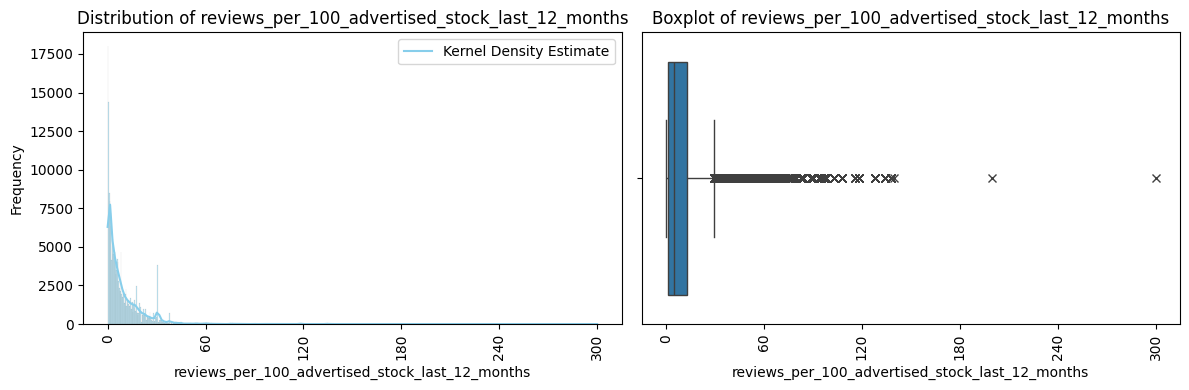

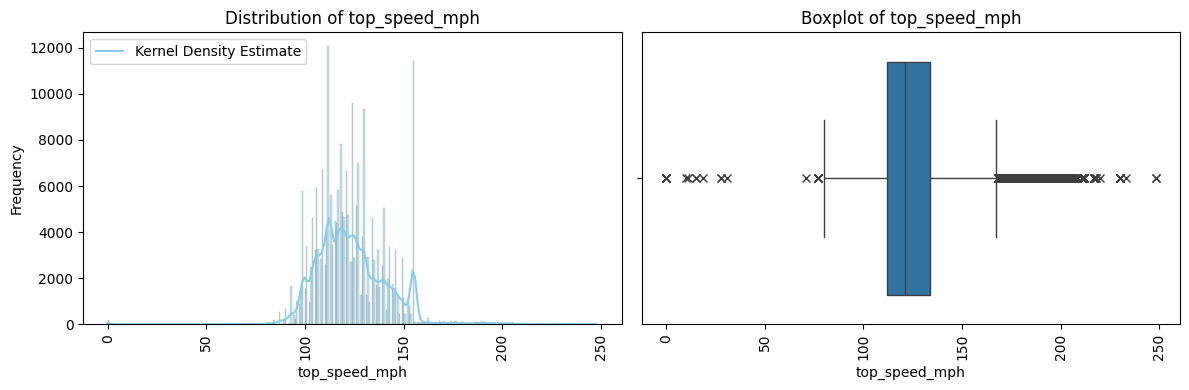

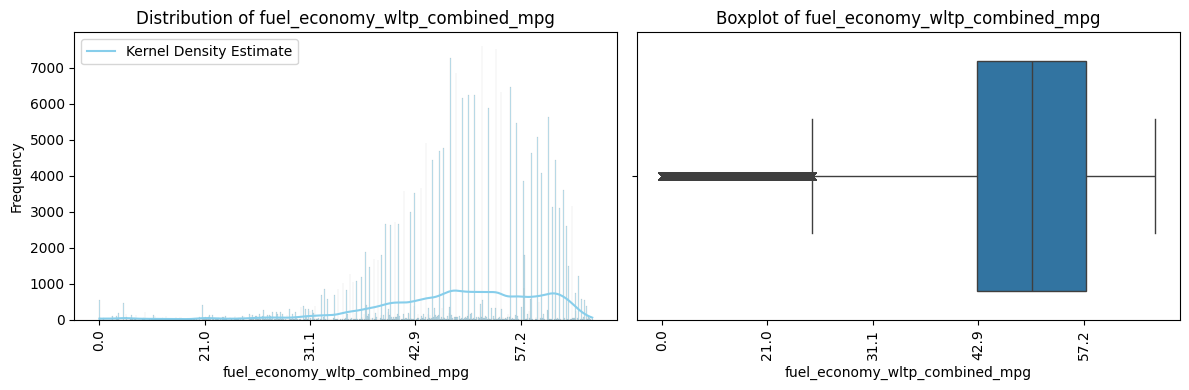

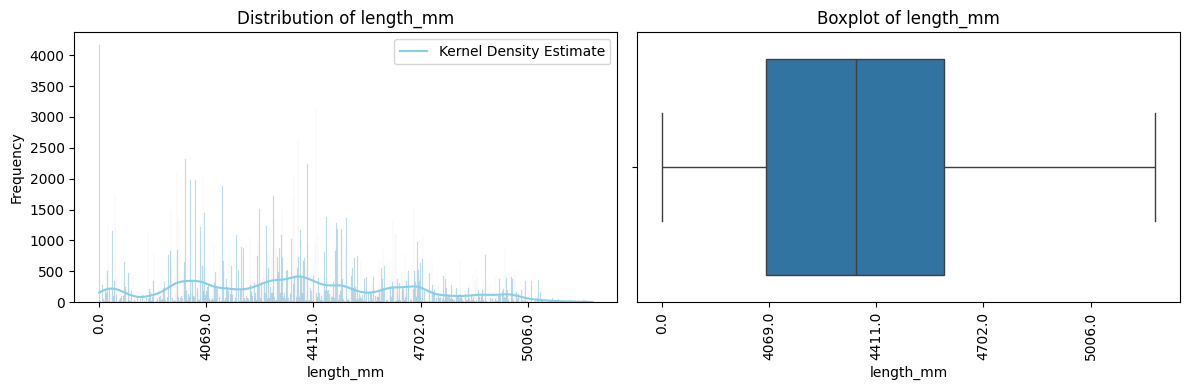

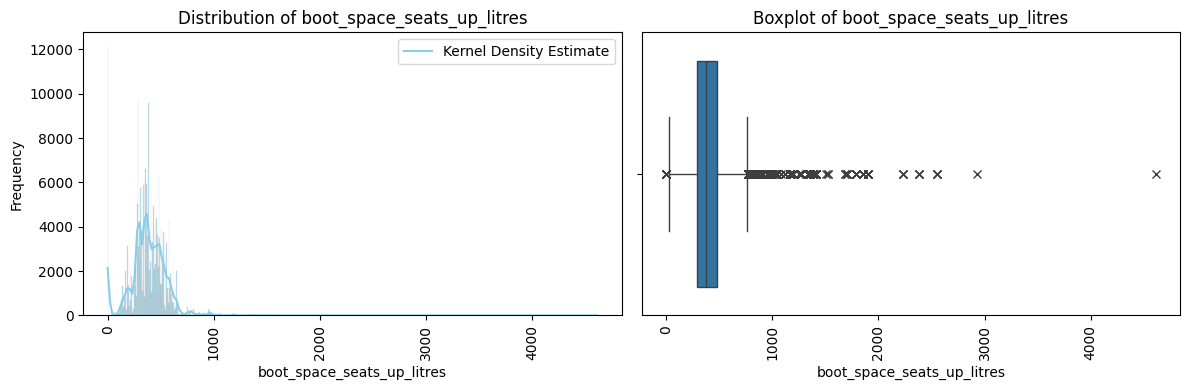

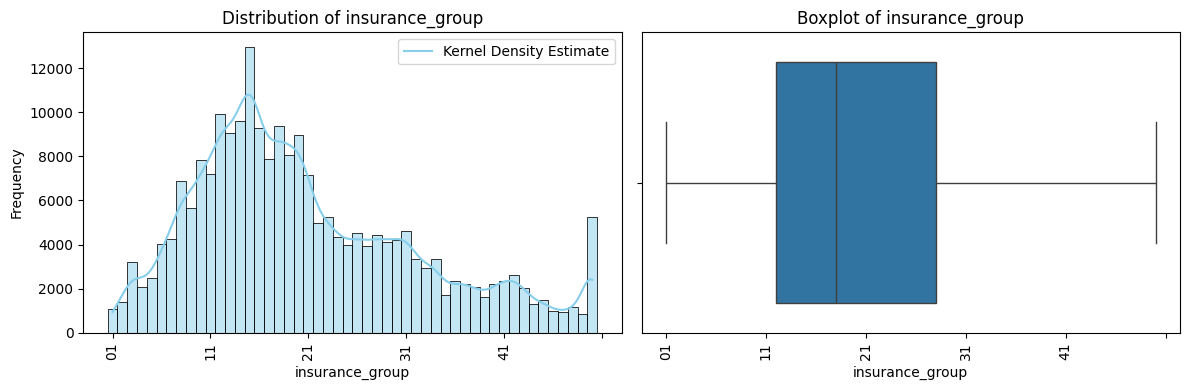

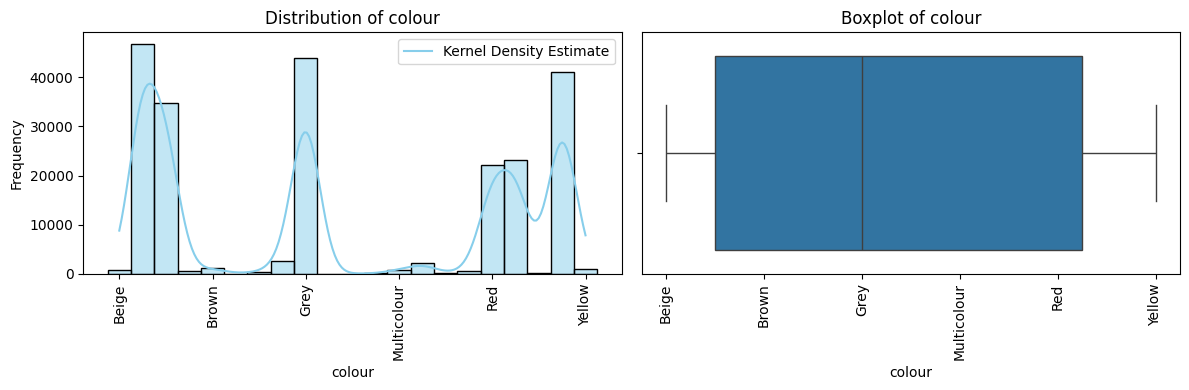

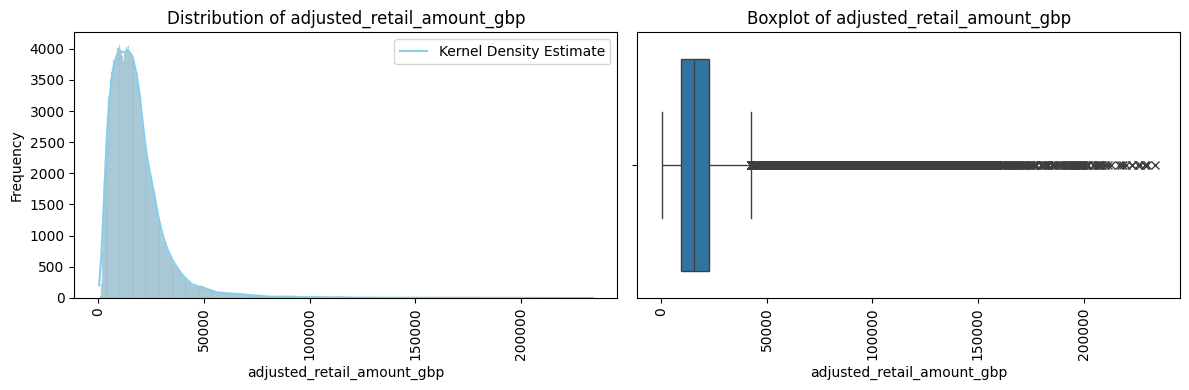

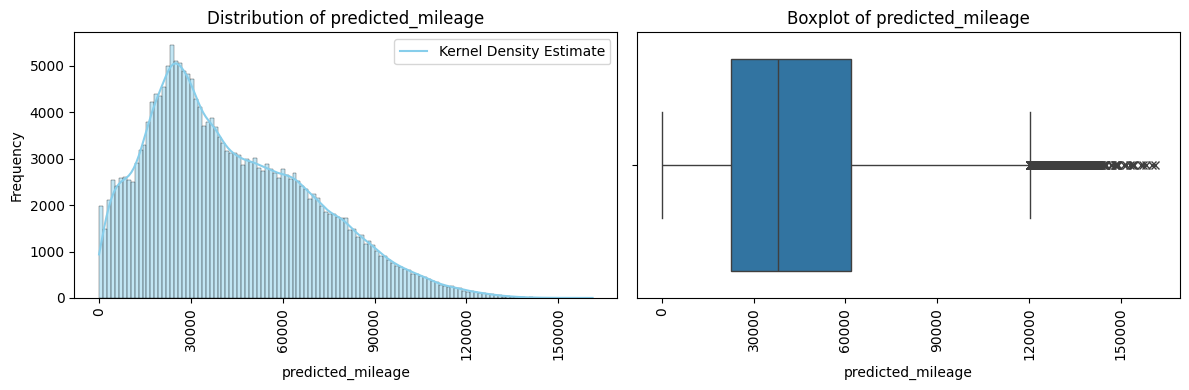

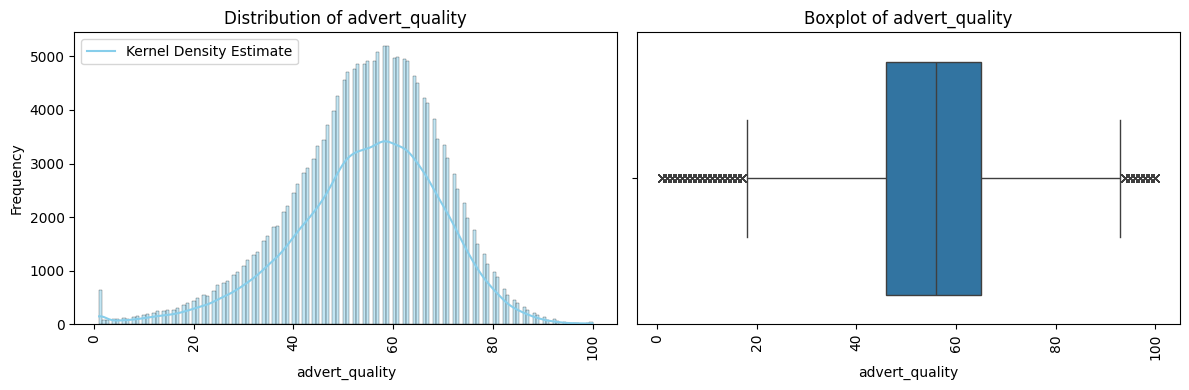

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


def plot_column_distribution(data, column_name):
    """
    Plot the distribution of values for a given column using a histogram and a boxplot.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.

    Returns:
        None
    """
    # Sort the DataFrame based on the column_name
    sorted_data = data.sort_values(by=column_name)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
    
    # Plot histogram on the first subplot
    sns.histplot(data=sorted_data[column_name], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    axes[0].legend(['Kernel Density Estimate'])
    
    # Set vertical x-axis labels for histogram
    axes[0].tick_params(axis='x', rotation=90)
    
    # Adjust the number of ticks for the histogram
    axes[0].xaxis.set_major_locator(MaxNLocator(nbins=6))
    
    # Plot boxplot on the second subplot
    sns.boxplot(x=sorted_data[column_name], ax=axes[1], flierprops=dict(marker='x', markersize=6))
    axes[1].set_title(f'Boxplot of {column_name}')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('')
    
    # Set vertical x-axis labels for boxplot
    axes[1].tick_params(axis='x', rotation=90)
    
    # Adjust the number of ticks for the boxplot
    axes[1].xaxis.set_major_locator(MaxNLocator(nbins=6))
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plot
    plt.show()


columns_with_nans = [
    'reviews_per_100_advertised_stock_last_12_months',
    'top_speed_mph',
    'fuel_economy_wltp_combined_mpg',
    'length_mm',
    'boot_space_seats_up_litres',
    'insurance_group',
    'colour',
    'adjusted_retail_amount_gbp',
    'predicted_mileage',
    'advert_quality'
]

for cn in columns_with_nans:
    plot_column_distribution(data_features_cleaned,cn)



## Dealing With The missing NaN Values

Following [1], We firstly replace the missing colour values with the modal color.




[1] Hamid Ahaggach, Lylia Abrouk, Sebti Foufou, Eric Lebon. Predicting Car Sale Time with Data Analytics and Machine Learning. Product Lifecycle Management. PLM in Transition Times: The Place
of Humans and Transformative Technologies, Jul 2022, Grenoble, France. pp.399-409, ff10.1007/978-
3-031-25182-5_39ff. ffhal-04250878f

### Helper Functions for plotting feature against days to sell

In [196]:
def plot_category_against_days(feature: str, df: pd.DataFrame, metrics=True) -> None:
    plt.figure(figsize=(10, 6))
    
    feature_pp = feature.replace('_', ' ').capitalize()
    print(f"{feature_pp} statistics:")

    # Create the boxplot
    ax = sns.boxplot(x=feature, y='days_to_sell', data=df.sort_values(by=feature))
    plt.title(f'{feature_pp} vs. Days to Sell')
    plt.xlabel(feature_pp)
    plt.ylabel('Days to Sell')
    
    if metrics:
        # Calculate counts, mean, and stdev for each category
        categories = df[feature].unique()
        for cat in categories:
            category_data = df[df[feature] == cat]['days_to_sell']
            count = category_data.count()
            mean = category_data.mean()
            stdev = category_data.std()
            print(f"Category: {cat}, Count: {count}, Mean: {mean:.2f}, StdDev: {stdev:.2f}")

    # Annotate each box with the count of data points
    counts = df[feature].value_counts()
    for i, box in enumerate(ax.artists):
        # Get the center of the box and the count
        center = box.get_x() + box.get_width() / 2
        cat = box.get_x()
        count = counts.iloc[i]  # Get the count based on the box's order

        # Place the text on the plot for count
        plt.text(center, df['days_to_sell'].max() * 1.01, f'N={count}',
                 horizontalalignment='center', size='small', color='black', weight='semibold')

    plt.show() 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_num_against_days(feature: str, df: pd.DataFrame) -> None:
    plt.figure(figsize=(10, 6))
    
    # Sort the DataFrame by the feature column
    df_sorted = df.sort_values(by=feature)
    
    feature_pp = feature.replace('_', ' ').capitalize()
    sns.scatterplot(x=feature, y='days_to_sell', data=df_sorted)
    plt.title(feature_pp)
    plt.xlabel(feature_pp)
    plt.ylabel('Days to Sell')
    
    # Rotate x-axis labels
    
    plt.show()


### Colour

In [150]:
# Make a copy of cleaned dataframe
mn_dataframe = data_features_cleaned.copy()

In [154]:
most_popular_color = mn_dataframe['colour'].mode()[0]
print(f"The most popular entry in the column is: {most_popular_color}")

print(mn_dataframe["colour"].isna().sum())

The most popular entry in the column is: Black
0


In [191]:
mn_dataframe.fillna({'colour': 'Black'}, inplace=True)

print(mn_dataframe["colour"].isna().sum())

0


### Insurance Group

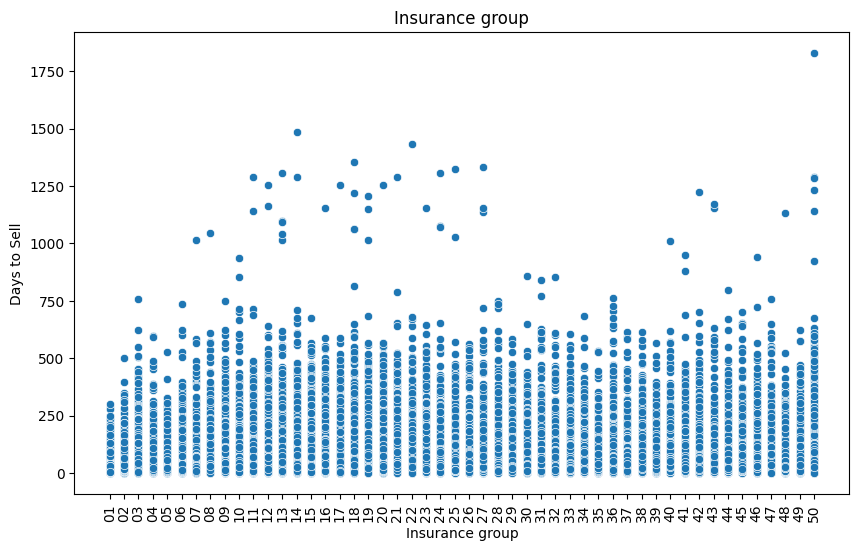

Insurance group statistics:
Category: 31, Count: 4625, Mean: 45.87, StdDev: 56.41
Category: 10, Count: 7815, Mean: 39.99, StdDev: 49.00
Category: 23, Count: 5258, Mean: 46.31, StdDev: 59.57
Category: 33, Count: 2944, Mean: 46.38, StdDev: 55.01
Category: 09, Count: 5664, Mean: 42.02, StdDev: 52.06
Category: 11, Count: 7202, Mean: 38.01, StdDev: 49.24
Category: 27, Count: 3946, Mean: 47.18, StdDev: 65.27
Category: 50, Count: 5246, Mean: 68.67, StdDev: 90.74
Category: 15, Count: 12974, Mean: 39.59, StdDev: 46.83
Category: 45, Count: 1491, Mean: 57.15, StdDev: 75.53
Category: None, Count: 0, Mean: nan, StdDev: nan
Category: 25, Count: 4003, Mean: 46.36, StdDev: 60.52
Category: 07, Count: 4239, Mean: 39.75, StdDev: 49.21
Category: 36, Count: 2372, Mean: 50.52, StdDev: 67.70
Category: 44, Count: 1321, Mean: 57.81, StdDev: 74.30
Category: 19, Count: 8052, Mean: 43.08, StdDev: 53.91
Category: 18, Count: 9384, Mean: 42.06, StdDev: 55.36
Category: 21, Count: 7150, Mean: 46.25, StdDev: 57.14
Cate

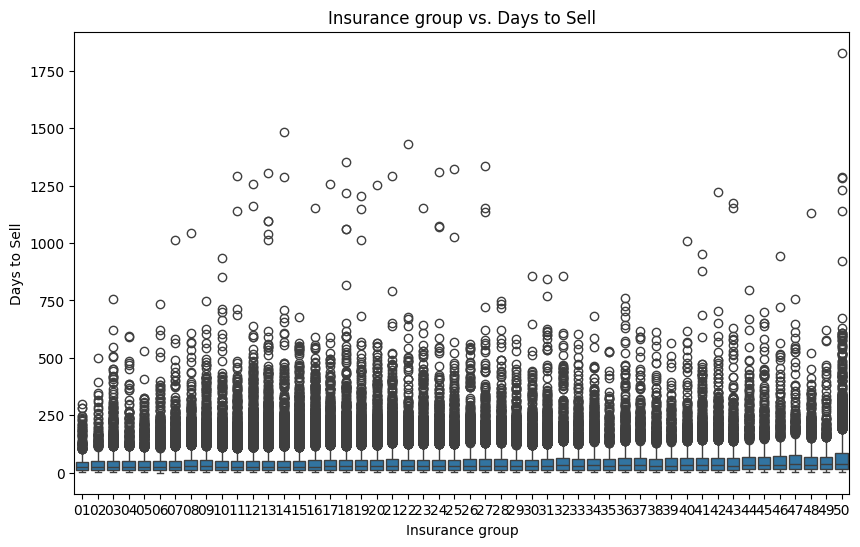

In [183]:
plot_num_against_days('insurance_group', data_features_cleaned)
plot_category_against_days('insurance_group', data_features_cleaned)

Possible considerations
- convert to numeric and set category as a mean value of columns?
- too noisy, uninclude category

### fuel economy

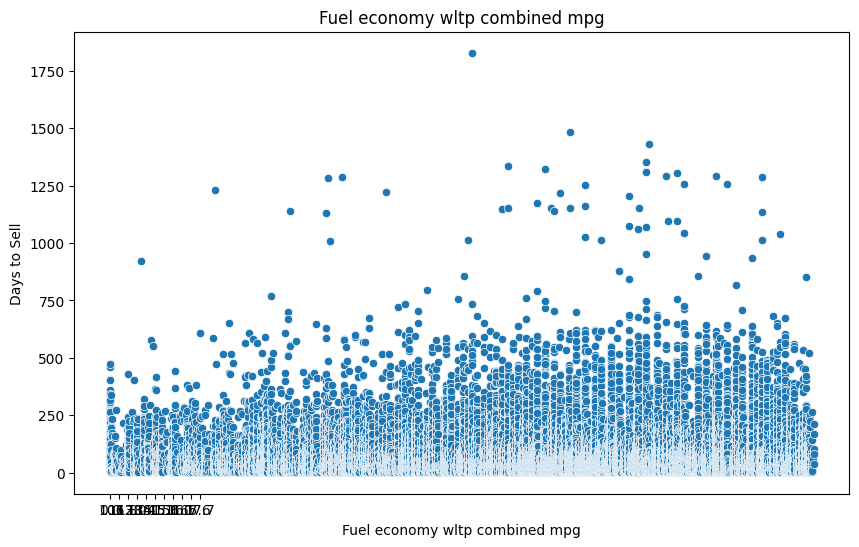

In [197]:
plot_num_against_days('fuel_economy_wltp_combined_mpg', data_features_cleaned)

Possibly too noise also

### Length

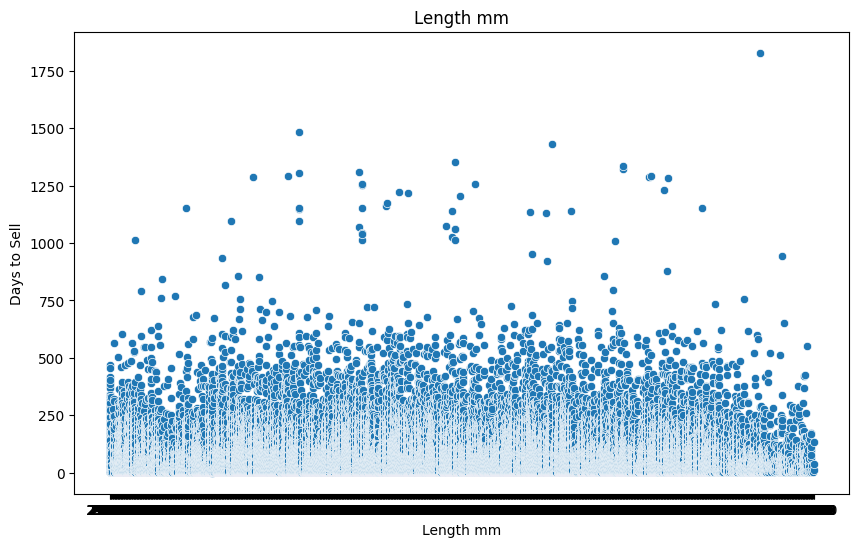

In [188]:
plot_num_against_days('length_mm', data_features_cleaned)

## Correlation Heatmap

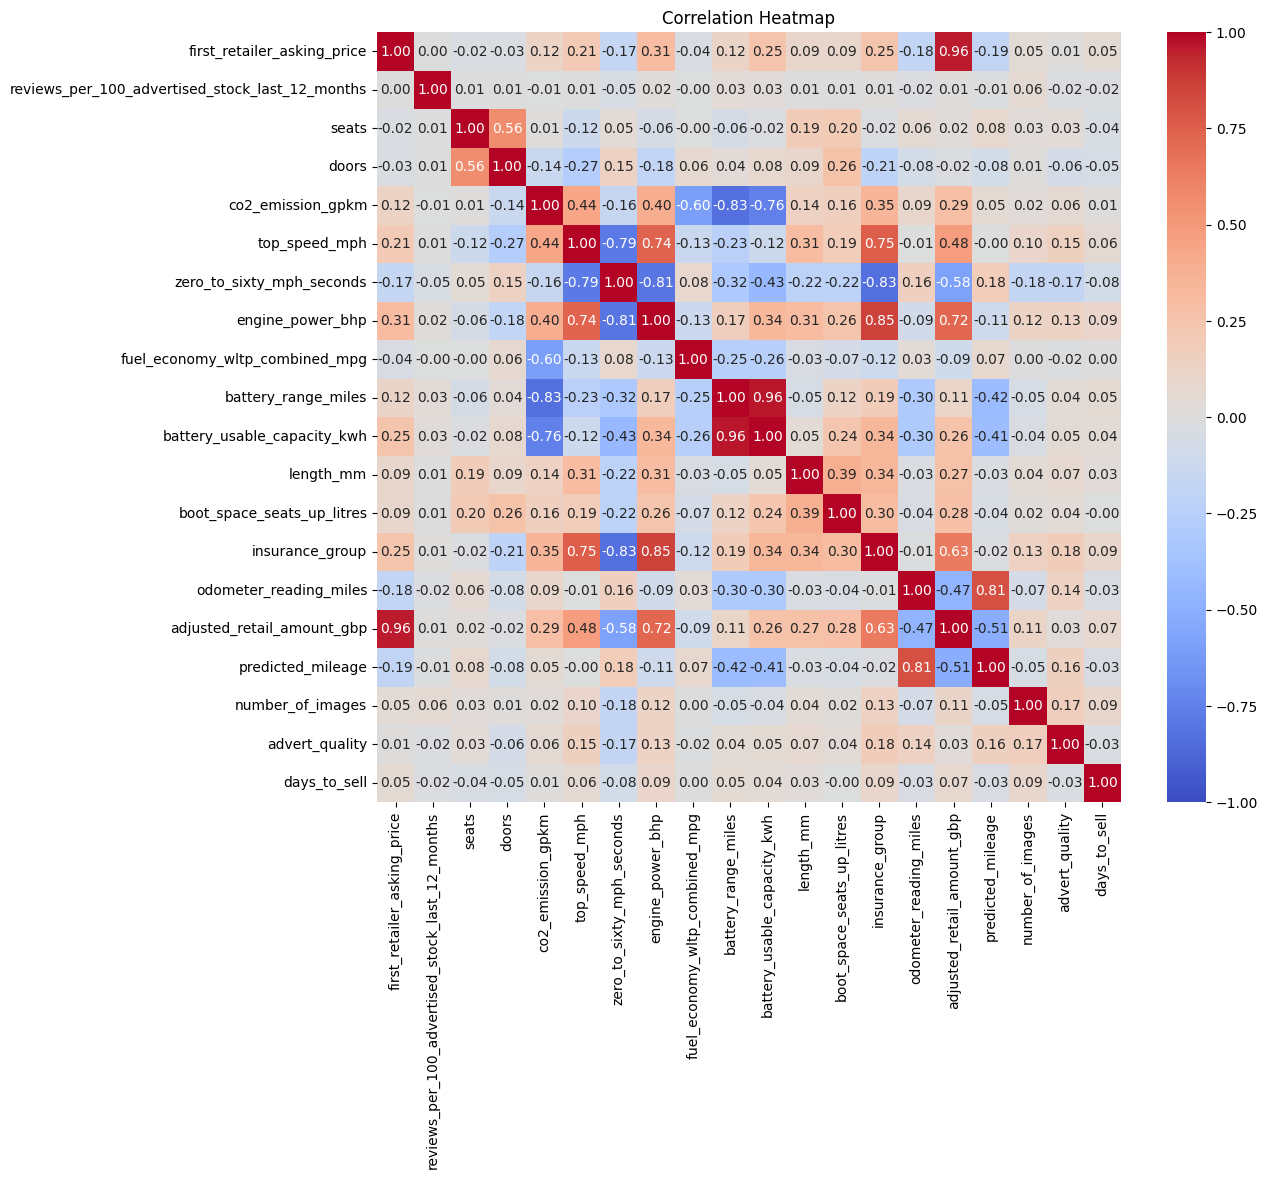

In [44]:
numerical_features = [
                      'first_retailer_asking_price',
                      'reviews_per_100_advertised_stock_last_12_months',
                      'seats',
                      'doors',
                      'co2_emission_gpkm',
                      'top_speed_mph',
                      'zero_to_sixty_mph_seconds',
                      'engine_power_bhp',
                      'fuel_economy_wltp_combined_mpg',
                      'battery_range_miles',
                      'battery_usable_capacity_kwh',
                      'length_mm',
                      'boot_space_seats_up_litres',
                      'insurance_group',
                      'odometer_reading_miles',
                      'adjusted_retail_amount_gbp',
                      'predicted_mileage',
                      'number_of_images',
                      'advert_quality',
                      'days_to_sell'
                      ]

def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap of all features in the DataFrame with respect to the target variable.

    Parameters:
        data (DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Compute the correlation matrix
    corr_matrix = data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Plot the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

    # Add title
    plt.title("Correlation Heatmap of Numerical Features")

    # Show plot
    plt.show()

# Example usage
# Assuming df is your DataFrame
# Replace 'your_target_variable' with the actual target variable column name
plot_correlation_heatmap(data_features_cleaned[numerical_features])

## Invesitgating correlation of categorical features

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


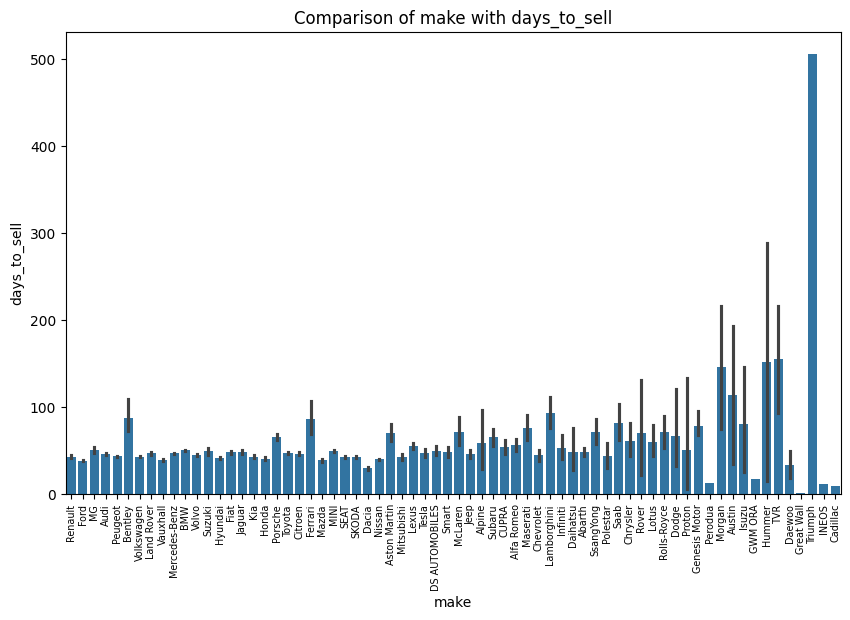

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


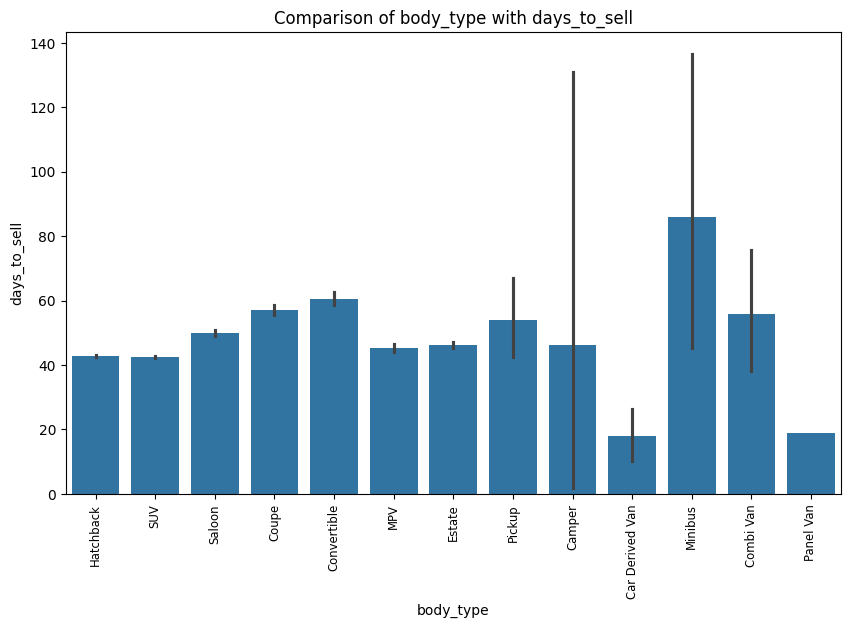

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


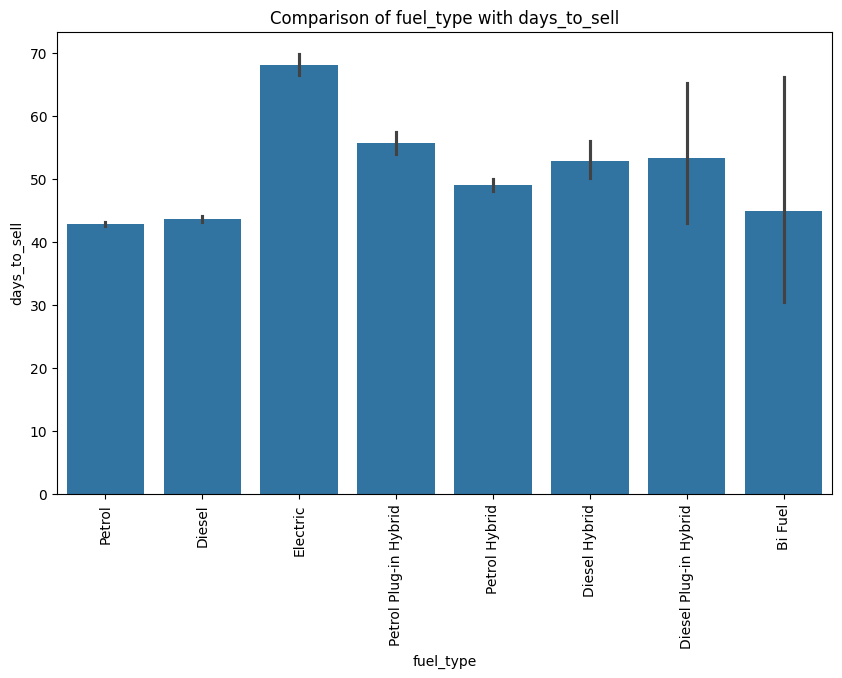

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


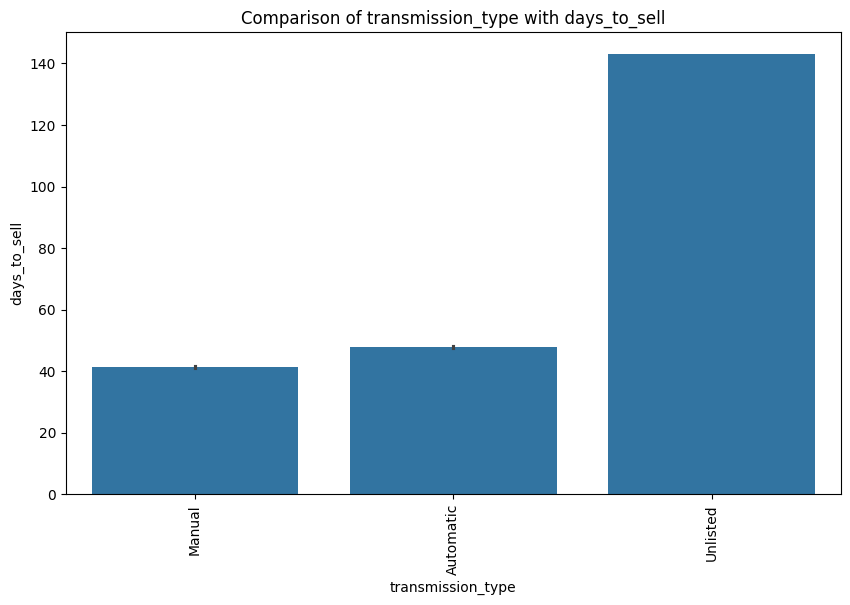

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


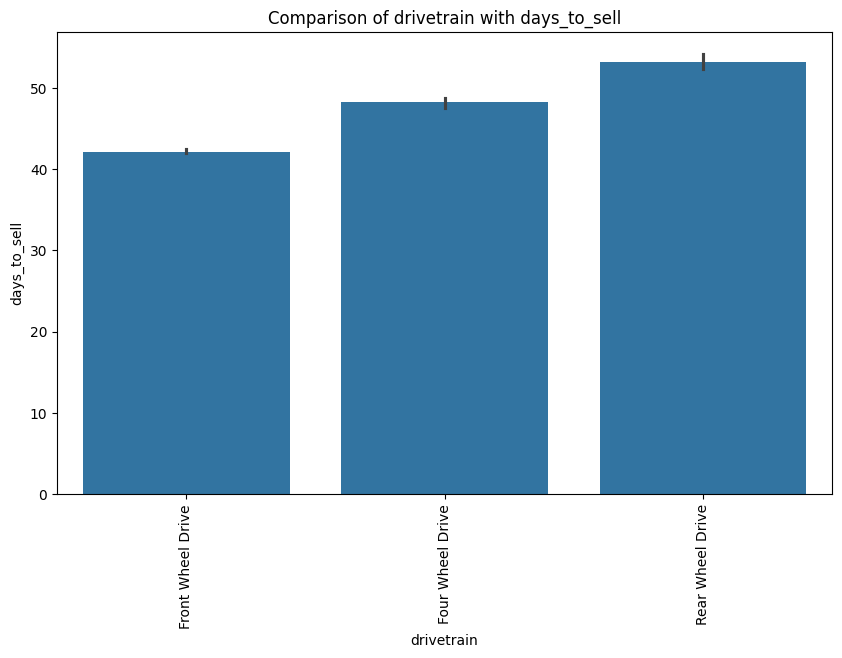

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


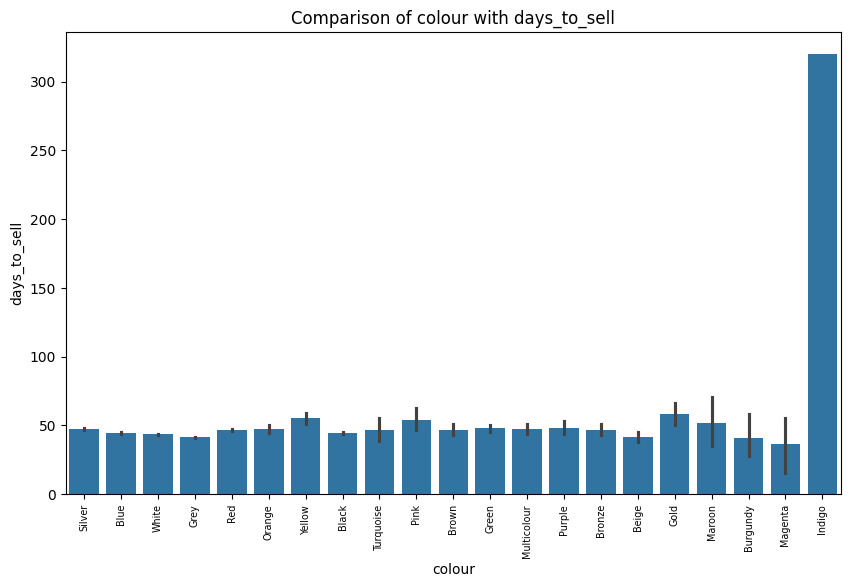

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


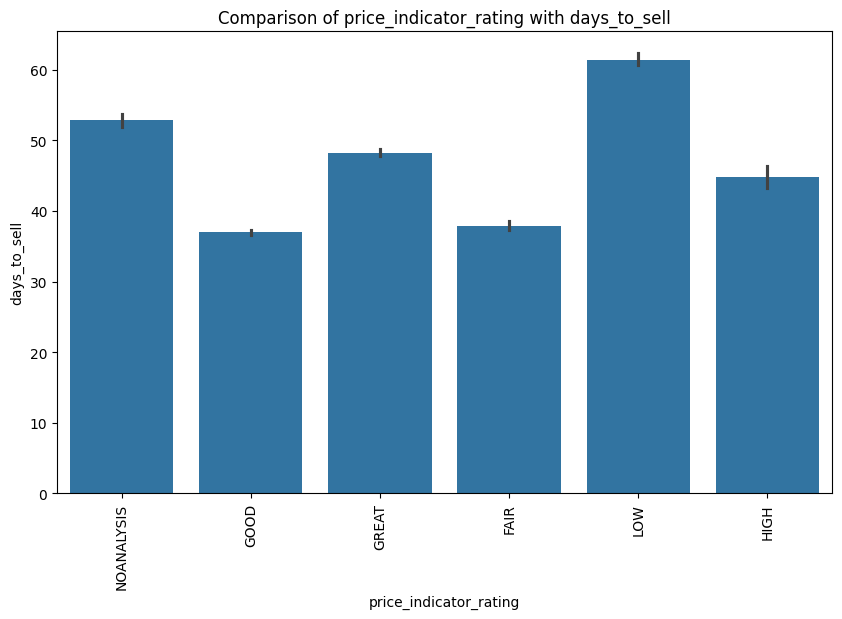

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


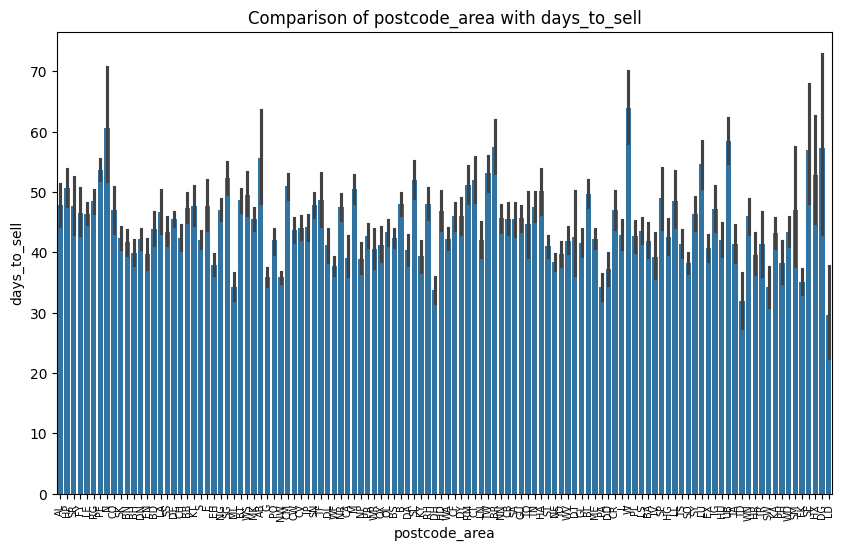

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


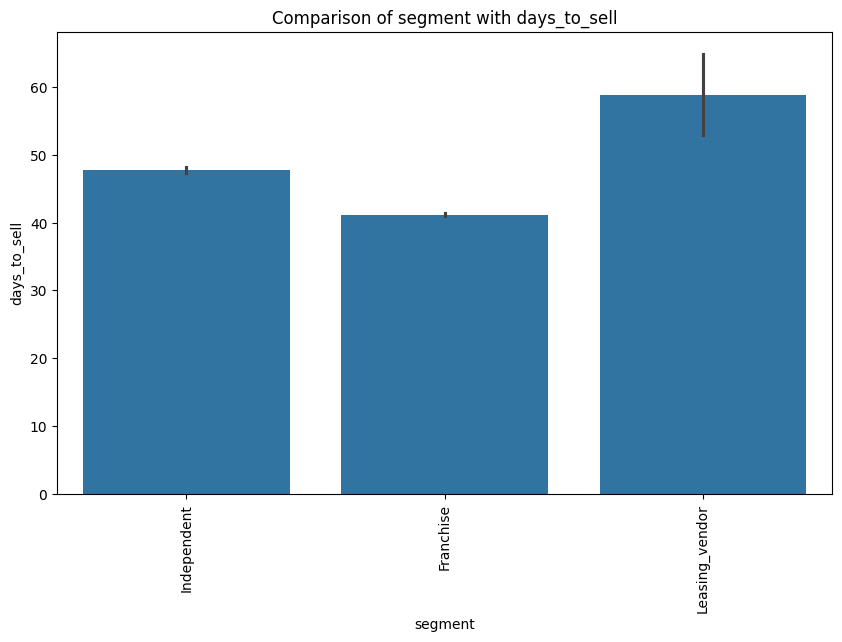

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, pearsonr, spearmanr

categorical_features = [
                        'make',
                        # 'model',
                        'body_type',
                        'fuel_type',
                        'transmission_type',
                        'drivetrain',
                        'colour',
                        'price_indicator_rating',
                        'postcode_area',
                        'segment'
                        ]

def compare_categorical_numerical(data, cat_feature, num_feature, size=(10,6)):
    """
    Compare the correlation of a categorical feature with a numerical feature (target variable).

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        cat_feature (str): The name of the categorical feature.
        num_feature (str): The name of the numerical feature (target variable).

    Returns:
        None
    """
    # Calculate font size based on the number of unique categories
    num_categories = len(data[cat_feature].unique())
    if num_categories <= 10:
        font_size = 'medium'
    elif num_categories <= 20:
        font_size = 'small'
    else:
        font_size = 'x-small'

    # Plot bar plot of categorical feature vs. numerical feature (target variable)
    plt.figure(figsize=size)
    ax = sns.barplot(x=cat_feature, y=num_feature, data=data)
    plt.title(f'Comparison of {cat_feature} with {num_feature}')
    plt.xlabel(cat_feature)
    plt.ylabel(num_feature)
    
    # Rotate x-axis labels and adjust font size
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)
    
    plt.show()
    
    # Perform ANOVA for categorical feature vs. numerical feature
    # anova_results = f_oneway(*[data[num_feature][data[cat_feature] == category] for category in data[cat_feature].unique()])
    # print(f"ANOVA p-value for {cat_feature} vs. {num_feature}: {anova_results.pvalue}")
    
    # Compute Pearson correlation coefficient for numerical feature vs. numerical feature
    # pearson_corr, _ = pearsonr(data[cat_feature], data[num_feature])
    # print(f"Pearson correlation coefficient for {cat_feature} vs. {num_feature}: {pearson_corr}")
    
    # Compute Spearman rank correlation coefficient for numerical feature vs. numerical feature
    # spearman_corr, _ = spearmanr(data[cat_feature], data[num_feature])
    # print(f"Spearman correlation coefficient for {cat_feature} vs. {num_feature}: {spearman_corr}")

# Example usage
# Replace 'categorical_feature' and 'numerical_feature' with actual column names from your dataset
    
for feature in categorical_features:
    compare_categorical_numerical(data, feature, 'days_to_sell')

## Investigating unique makes and models

### model

In [62]:
unique_models_by_make = data_features_cleaned.groupby('make')['model'].unique()

# Iterate over each unique 'make'
for make, models in unique_models_by_make.items():
    print(f"Make: {make}")
    print("Unique models:")
    for model in models:
        print(model)
    print()

Make: Abarth
Unique models:
595
500
595C
124 Spider
Punto Evo
695
500C
695C

Make: Alfa Romeo
Unique models:
MiTo
Giulietta
Giulia
GT
147
4C
159
Stelvio
Brera
Tonale
156
159 Sportwagon
Spider
GTV

Make: Alpine
Unique models:
A110

Make: Aston Martin
Unique models:
DB11
DB9
DBS
Vantage
Vanquish
DBX
Rapide S
Virage
Rapide
V8

Make: Audi
Unique models:
A6 Saloon
Q5
SQ5
A3
Q7
A3 Cabriolet
A1
TT
Q2
S3
Q3
A5
RS6 Avant
S5
e-tron
A8
A4
A7
A4 Allroad
A6 Avant
Q8
A5 Cabriolet
e-tron GT
RS3
A4 Avant
R8
TTS
S4
RSQ8
SQ8
Q4 e-tron
RS4 Avant
TT RS
RS7
S6 Saloon
S8
SQ7
S1
S4 Avant
RS4
A6 Allroad
RS5
RS6
RS e-tron GT
A4 Cabriolet
Q8 e-tron
RS Q3
SQ2
S7
e-tron S
S6 Avant
Cabriolet
A2
S4 Cabriolet

Make: BMW
Unique models:
3 Series
X2
X5 M
X5
X1
Z4
2 Series Gran Coupe
X6
4 Series
5 Series
6 Series Gran Coupe
1 Series
X3
4 Series Gran Coupe
2 Series Gran Tourer
i4
2 Series
M4
5 Series Gran Turismo
i3
2 Series Active Tourer
M3
7 Series
X4
3 Series Gran Turismo
M5
8 Series
iX3
iX
8 Series Gran Coupe
M2
X3 M

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


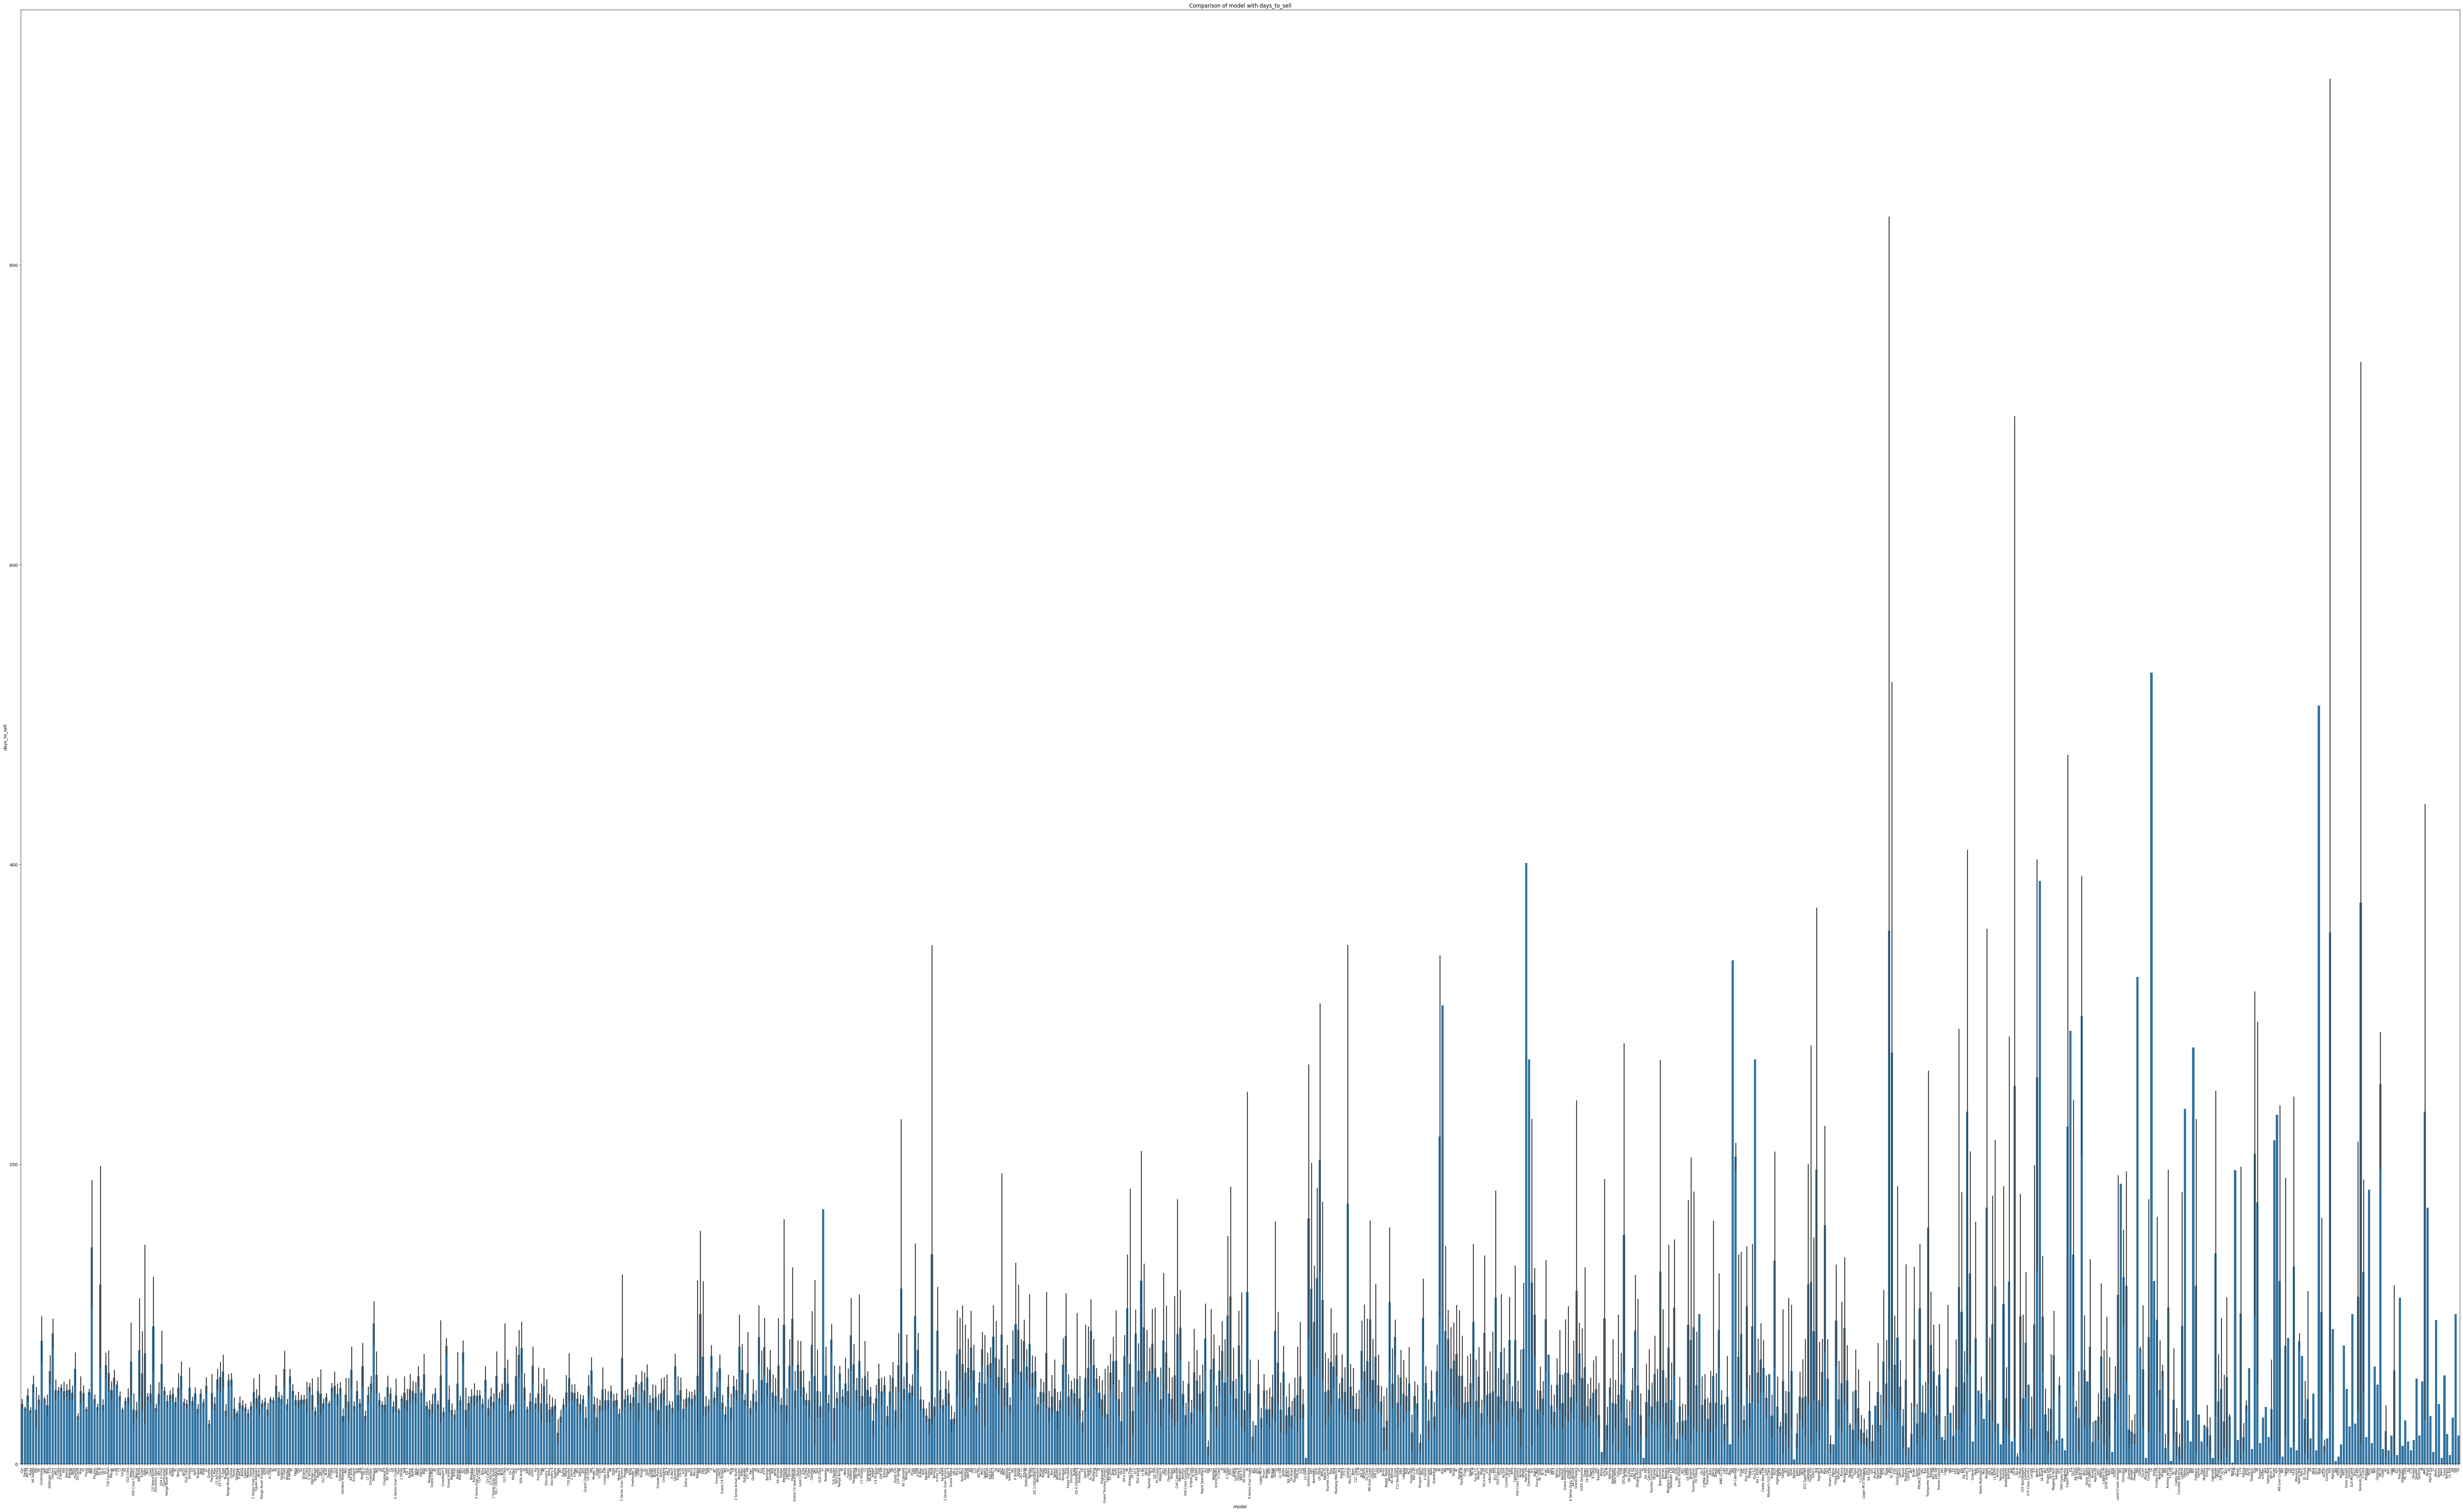

In [69]:
compare_categorical_numerical(data, "model", 'days_to_sell', (100,60))

### Make

C:\Users\igwen\AppData\Local\Temp\ipykernel_3032\1814092244.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=font_size)


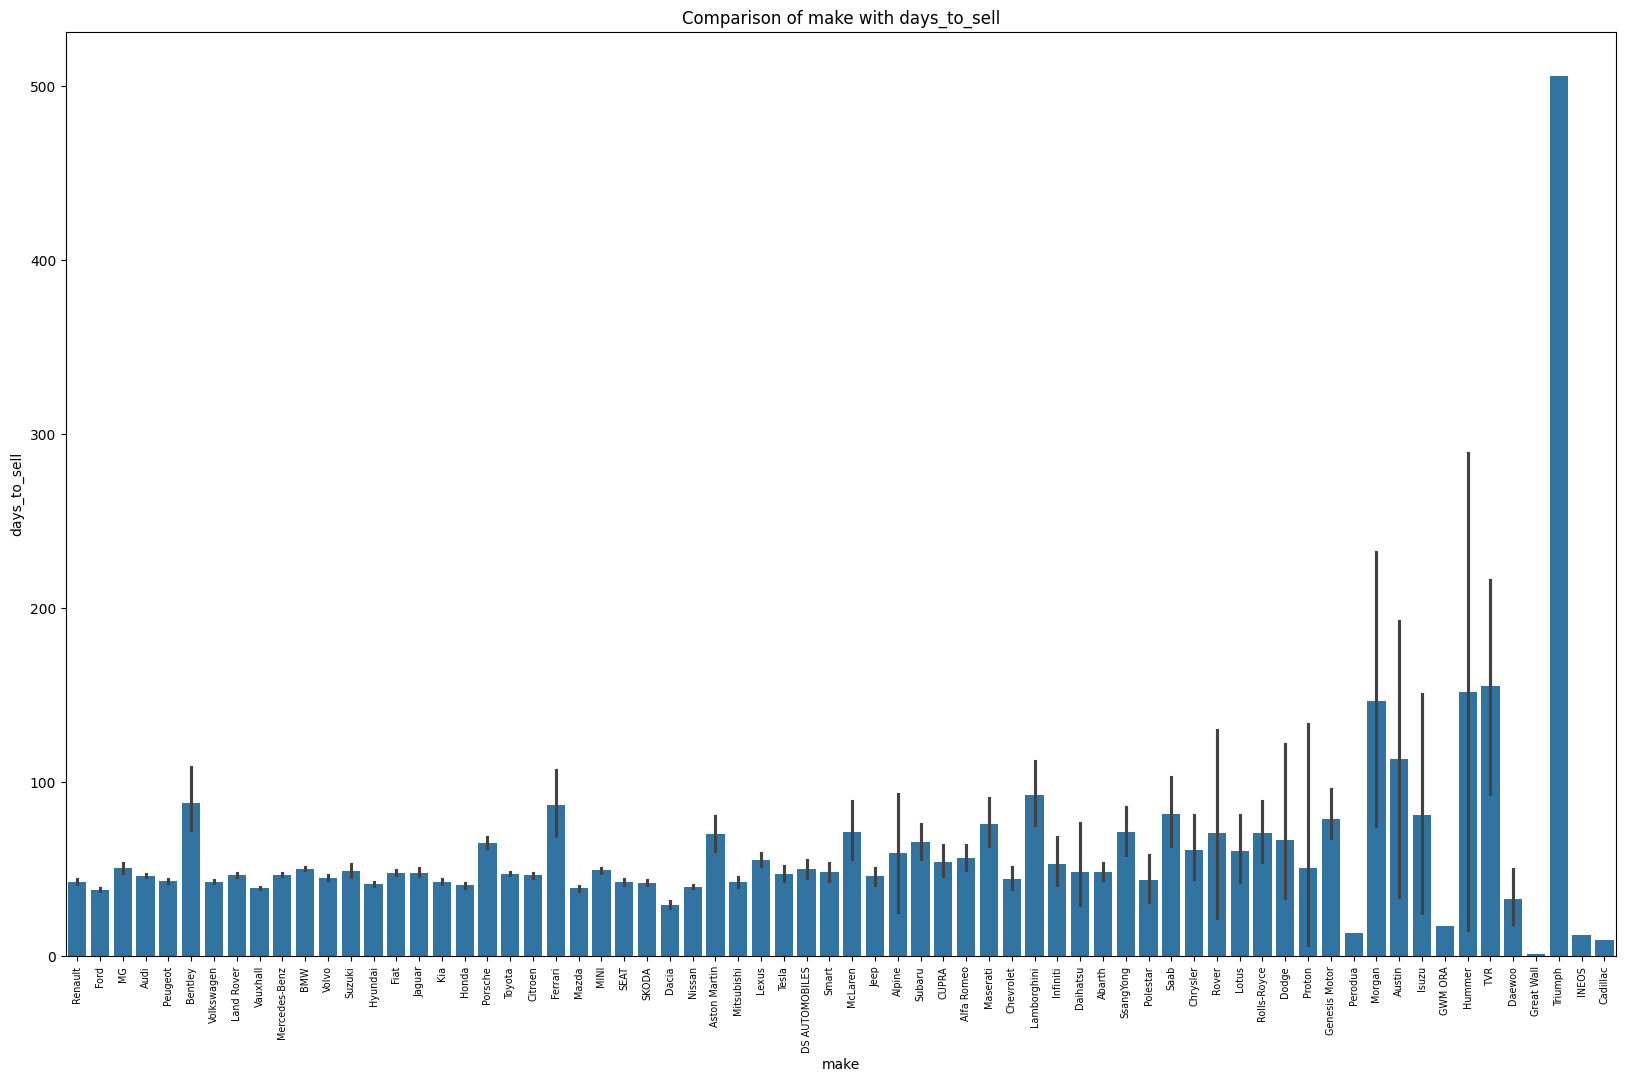

In [70]:
compare_categorical_numerical(data, "make", 'days_to_sell', (20,12))